Month describe mean, std etc. values

In [59]:
from asyncio.log import logger
from datetime import datetime
from tkinter import messagebox
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import logging
import time
import calendar
import string
import tkinter as tk
from numpy import isin
import numpy as np
import plotly.graph_objs as go
import sklearn
from scipy import stats
import warnings
import matplotlib.dates as mdates

In [60]:
MONTHS_DF = pd.read_csv(
    "C:/Users/admin/Masters-s-project/masters_project/machine_learning/data_analysis/air_pollution_smog_clear.csv"
)
MONTHS_DF.pop("entry_id")

0              1
1              2
2              3
3              4
4              5
           ...  
260378    260389
260379    260390
260380    260391
260381    260392
260382    260393
Name: entry_id, Length: 260383, dtype: int64

In [61]:
# all months desribe
DESCRIBE_DF = MONTHS_DF.describe()

In [62]:
def remove_df_outliers(df: pd.DataFrame = MONTHS_DF) -> pd.DataFrame:
    cols = ["PM1", "PM2.5", "PM10", "temp", "pressure", "humidity"]  # one or more

    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1

    df = df[
        ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
    ]

    return df


MONTHS_DF = remove_df_outliers()

In [63]:
# Months describe() functions


def get_month(month: str):

    if month == "November":
        start_date = "13/11/21"
        end_date = f"{calendar.monthrange(2021, 11)[1]}/11/21"
        # end_date = "31/11/21"
    elif month == "December":
        start_date = "01/12/21"
        end_date = f"{calendar.monthrange(2021, 12)[1]}/12/21"
        # # end_date = "31/12/21"
    elif month == "January":
        start_date = "01/01/22"
        end_date = f"{calendar.monthrange(2022, 1)[1]}/01/22"
        # end_date = "31/01/22"
    elif month == "February":
        start_date = "01/02/22"
        end_date = f"{calendar.monthrange(2022, 2)[1]}/02/22"
        # end_date = "28/12/21"
    elif month == "March":
        start_date = "01/03/22"
        end_date = f"{calendar.monthrange(2022, 3)[1]}/03/22"
        # end_date = "31/03/22"
    return [start_date, end_date]


def get_months() -> list:
    months = ["November", "December", "January", "February", "March"]
    return months


def get_month_describe(
    df: pd.DataFrame, start_date: str, end_date: str
) -> pd.DataFrame:

    df["date"] = pd.to_datetime(df["date"])
    new_df = (df["date"] >= start_date) & (df["date"] <= end_date)
    df1 = df.loc[new_df]
    df2 = df1.set_index("date")
    print()

    return df2.describe()


def remove_outliers(df, columns: list):
    z = np.abs(stats.zscore(df[columns]))
    print(z)

    return z


def get_columns(columns: list) -> list:
    return columns


def plot_data(df: pd.DataFrame, start_date: str, end_date: str, columns: list) -> None:

    df["date"] = pd.to_datetime(df["date"])
    new_df = (df["date"] >= start_date) & (df["date"] <= end_date)
    df2 = df.loc[new_df]
    plt.rcParams["figure.figsize"] = [12.0, 4]
    plt.rcParams["figure.autolayout"] = True

    df2.plot(x="date", y=get_columns(columns))

    plt.xlabel("Date -->", fontsize=14, color="green")
    plt.ylabel("Values -->", fontsize=14, color="r")
    plt.show()


def plot_specific_data(
    df: pd.DataFrame, start_date: str, end_date: str, columns: list
) -> None:

    plot_1 = columns[0]
    plot_2 = columns[1]
    plot_3 = columns[2]
    plots = [plot_1, plot_2, plot_3]

    df["date"] = pd.to_datetime(df["date"])
    new_df = (df["date"] >= start_date) & (df["date"] <= end_date)
    df2 = df.loc[new_df]
    plt.rcParams["figure.figsize"] = [12.0, 4]
    plt.rcParams["figure.autolayout"] = True

    for i in plots:
        df2.resample("1d").median().plot(x="date", y=i)
        plt.xlabel("Date", fontsize=14, color="green")
        plt.ylabel("Values ", fontsize=14, color="orange")
        warnings.simplefilter(action="ignore", category=FutureWarning)
    plt.show()

In [64]:
"""
MONTHS DATAFRAMES
"""
NOVEMBER_DF = pd.DataFrame()
DECEMBER_DF = pd.DataFrame()
JANUARY_DF = pd.DataFrame()
FEBRUARY_DF = pd.DataFrame()
MARCH_DF = pd.DataFrame()
MONTHS = [NOVEMBER_DF, DECEMBER_DF, JANUARY_DF, FEBRUARY_DF, MARCH_DF]
df_drops = ["count", "std" "25%", "50%", "75%"]
df_drops_len = len(df_drops)
GET_MONTHS = [
    get_month_describe(MONTHS_DF, get_month(i)[0], get_month(i)[1]).drop("count")
    for i in get_months()
]



C:\Users\admin\AppData\Local\Temp\ipykernel_18984\2514345421.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])
C:\Users\admin\AppData\Local\Temp\ipykernel_18984\2514345421.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])


C:\Users\admin\AppData\Local\Temp\ipykernel_18984\2514345421.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])
C:\Users\admin\AppData\Local\Temp\ipykernel_18984\2514345421.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])
C:\Users\admin\AppData\Local\Temp\ipykernel_18984\2514345421.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [65]:
MONTHS_DF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PM1,234823.0,25.719751,14.044272,0.00000,15.000000,26.00000,35.00000,66.00000
PM2.5,234822.0,40.050800,23.938186,0.00000,21.000000,39.00000,55.00000,109.00000
PM10,234822.0,50.585478,30.522012,0.00000,25.000000,49.00000,72.00000,148.00000
temp,234822.0,4.232853,4.637650,-8.81000,1.120000,3.60000,7.08000,17.59000
pressure,234822.0,1021.404844,11.167176,990.86566,1013.784045,1022.81006,1029.41876,1044.45349
humidity,234822.0,62.052537,17.941021,10.03418,50.169193,66.43701,76.20508,100.00000


In [66]:
"""
November
"""
# GET_MONTHS[0].to_csv("csv_month_describe/November_desc.csv")
# GET_MONTHS[0].to_csv("csv_month_describe_filter/November_desc_filter.csv")
GET_MONTHS[0]


,PM1,PM2.5,PM10,temp,pressure,humidity
mean,34.146313,55.352867,70.733504,5.878998,1017.503628,73.448682
std,9.831589,17.694102,22.289517,2.753116,11.332045,9.400380
min,0.000000,0.000000,0.000000,-0.990000,993.432860,29.980470
25%,28.000000,45.000000,58.000000,4.150000,1009.742095,69.171390
50%,34.000000,55.000000,72.000000,5.850000,1023.067320,75.990230
75%,39.000000,64.000000,85.000000,7.510000,1026.437135,79.192875
max,66.000000,109.000000,141.000000,17.460000,1030.739870,88.958010


In [67]:
"""
December
"""
# GET_MONTHS[1].to_csv("csv_month_describe/December_desc.csv")
# GET_MONTHS[1].to_csv("csv_month_describe_filter/December_desc_filter.csv")
GET_MONTHS[1]

,PM1,PM2.5,PM10,temp,pressure,humidity
mean,32.466640,52.115977,66.596238,3.650943,1016.006164,73.709854
std,10.706405,19.055671,24.531723,4.295921,10.325076,10.551220
min,0.000000,0.000000,0.000000,-8.810000,993.432860,29.980470
25%,26.000000,40.000000,50.000000,1.290000,1008.037110,69.216800
50%,32.000000,52.000000,67.000000,4.450000,1017.402400,76.395510
75%,39.000000,63.000000,83.000000,6.410000,1024.646240,80.131840
max,66.000000,109.000000,147.000000,17.460000,1030.739870,96.873050


In [68]:
"""
January
"""
# GET_MONTHS[2].to_csv("csv_month_describe/January_desc.csv")
# GET_MONTHS[2].to_csv("csv_month_describe_filter/January_desc_filter.csv")
GET_MONTHS[2]

,PM1,PM2.5,PM10,temp,pressure,humidity
mean,24.002074,37.151722,47.393789,1.976261,1022.793090,70.701555
std,13.043577,22.045173,28.830546,3.529657,9.806774,10.561019
min,0.000000,0.000000,0.000000,-6.330000,994.319580,24.324220
25%,14.000000,20.000000,24.000000,-0.420000,1015.684465,64.375245
50%,23.000000,35.000000,43.000000,1.730000,1023.645570,73.173830
75%,33.000000,51.000000,68.000000,3.500000,1029.995730,78.662845
max,66.000000,109.000000,147.000000,14.190000,1038.802860,93.930660


In [69]:
"""
February
"""
# GET_MONTHS[3].to_csv("csv_month_describe/February_desc.csv")
# GET_MONTHS[3].to_csv("csv_month_describe_filter/Februaru_desc_filter.csv")
GET_MONTHS[3]

,PM1,PM2.5,PM10,temp,pressure,humidity
mean,21.311194,32.670636,41.387515,3.608424,1019.66089,66.367691
std,13.729451,22.953332,29.648288,3.984182,10.34954,13.139733
min,0.000000,0.000000,0.000000,-6.330000,990.86566,22.665040
25%,10.000000,13.000000,16.000000,1.010000,1012.79559,59.249755
50%,20.000000,30.000000,36.000000,3.010000,1019.64374,69.363280
75%,30.000000,47.000000,62.000000,6.062500,1027.70160,76.220700
max,66.000000,109.000000,148.000000,17.590000,1038.80286,100.000000


In [70]:
"""
March
"""
# GET_MONTHS[4].to_csv("csv_month_describe/March_desc.csv")
# GET_MONTHS[4].to_csv("csv_month_describe_filter/March_desc_filter.csv")
GET_MONTHS[4]

,PM1,PM2.5,PM10,temp,pressure,humidity
mean,24.527169,37.954626,47.820949,4.248305,1022.827250,58.988447
std,14.454531,24.473904,31.078302,4.688817,10.815435,17.758250
min,0.000000,0.000000,0.000000,-6.590000,990.865660,10.034180
25%,13.000000,18.000000,22.000000,1.060000,1014.982820,46.171390
50%,24.000000,36.000000,44.000000,3.420000,1023.761470,62.790040
75%,34.000000,53.000000,70.000000,7.070000,1031.112855,73.533200
max,66.000000,109.000000,148.000000,17.590000,1044.453490,100.000000


November


C:\Users\admin\AppData\Local\Temp\ipykernel_18984\2514345421.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])


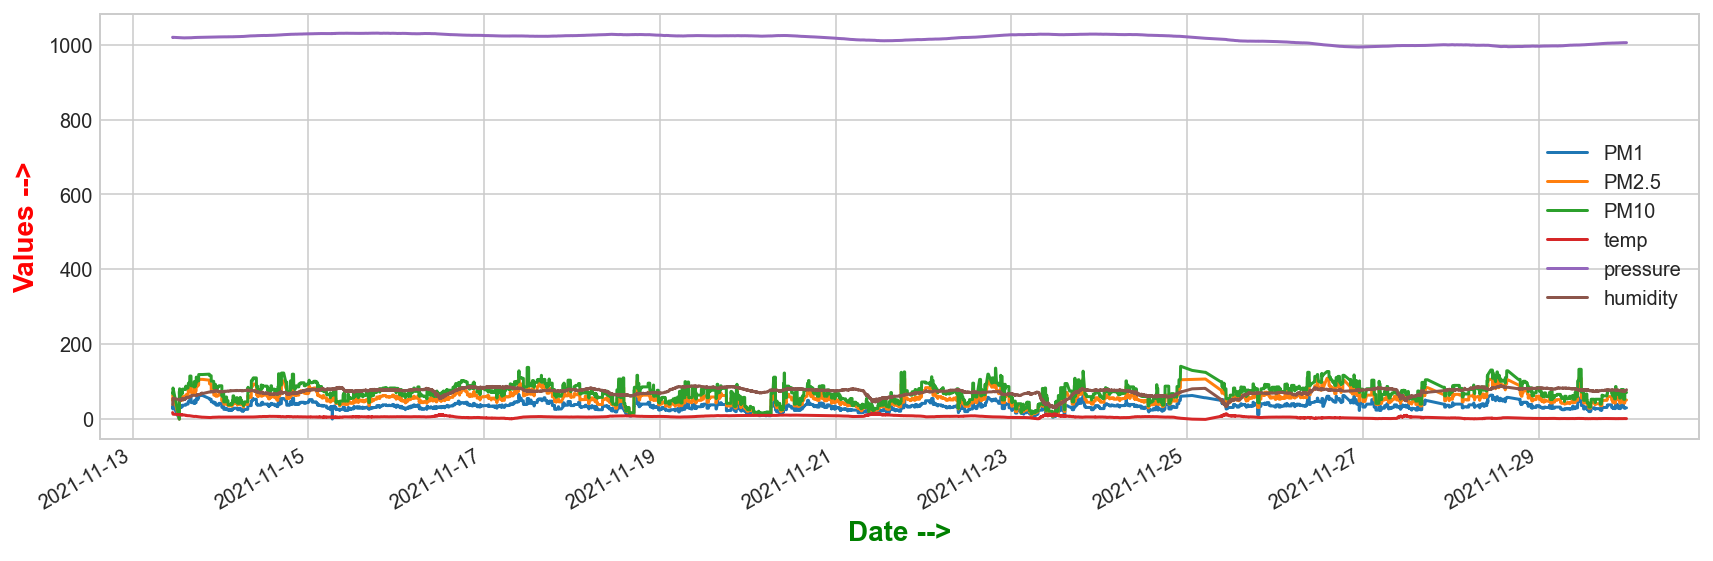

December


C:\Users\admin\AppData\Local\Temp\ipykernel_18984\2514345421.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])


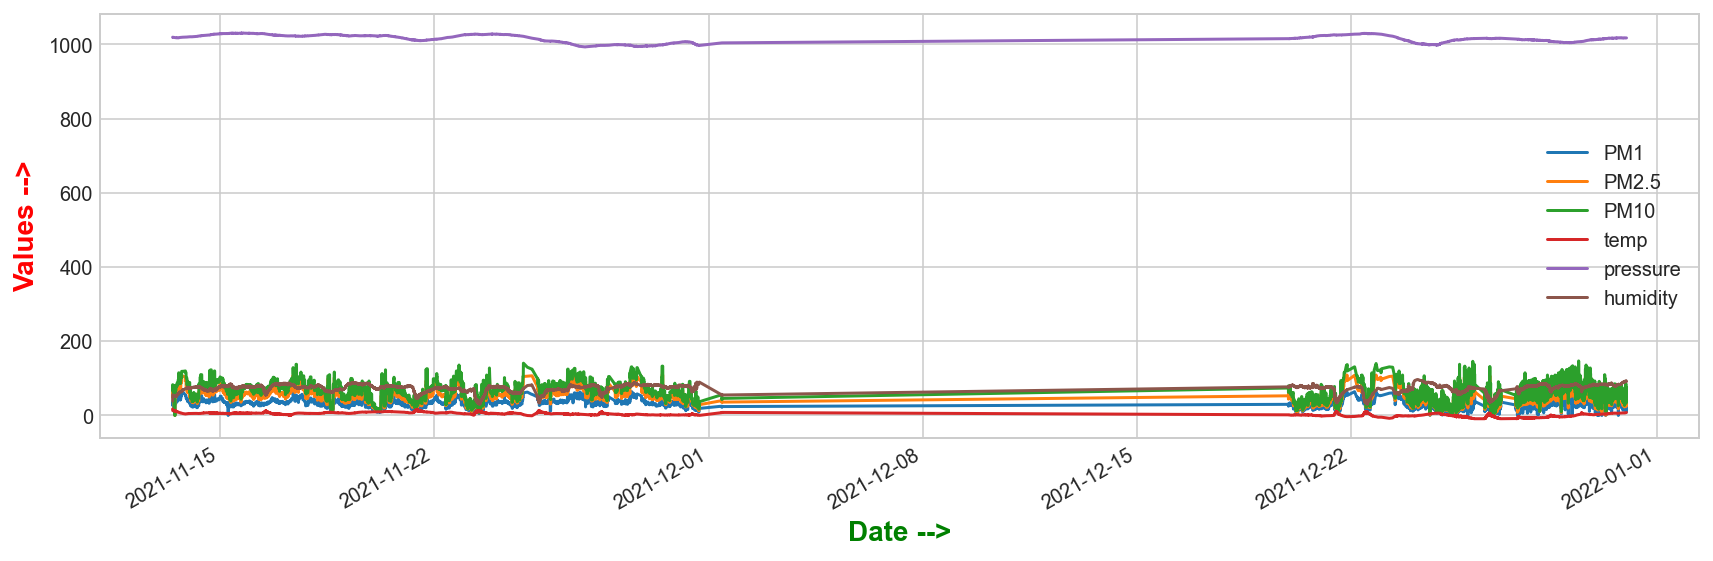

January


C:\Users\admin\AppData\Local\Temp\ipykernel_18984\2514345421.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])


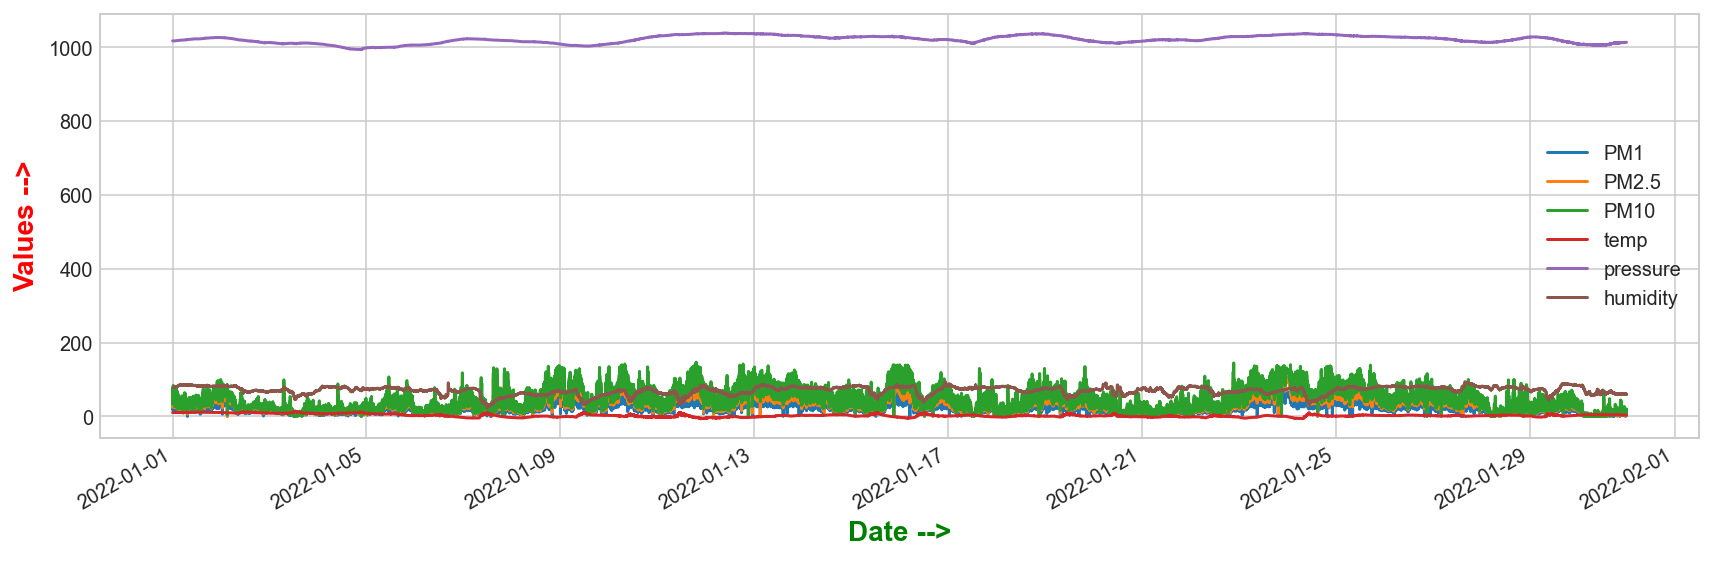

February


C:\Users\admin\AppData\Local\Temp\ipykernel_18984\2514345421.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])


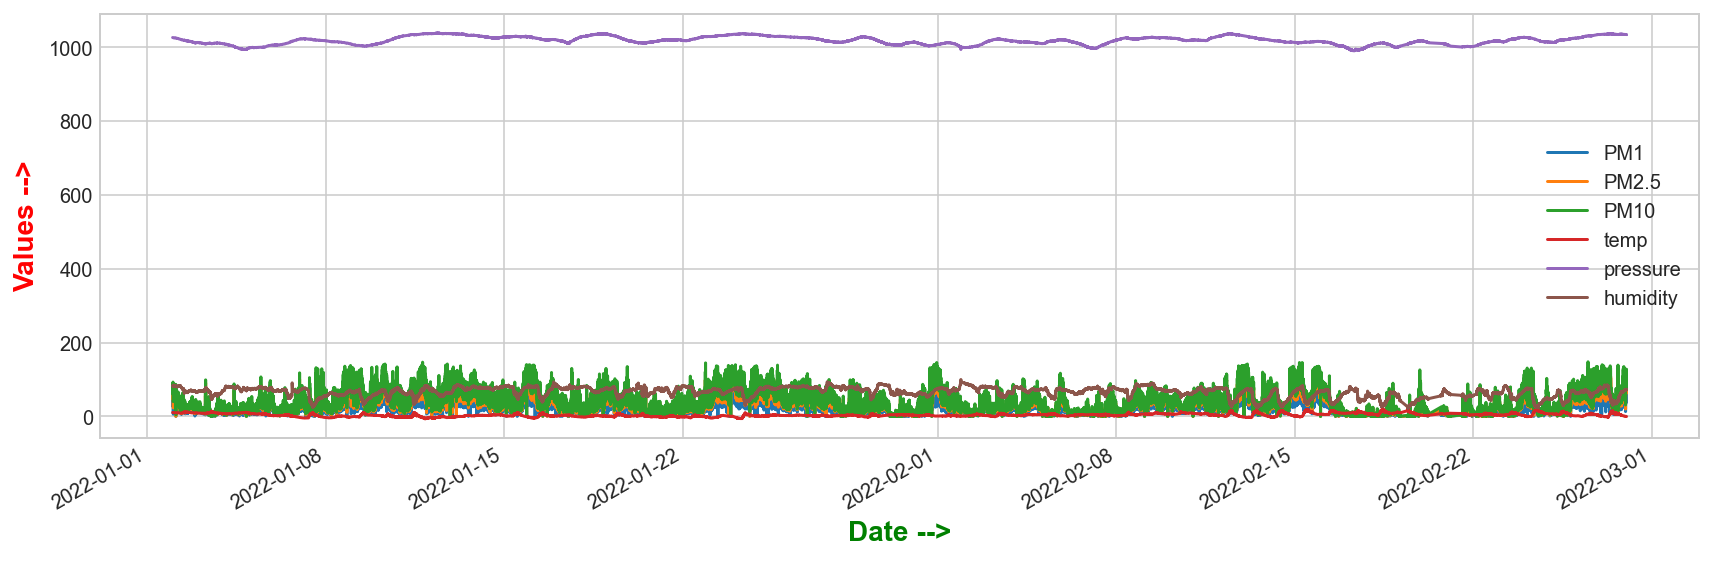

March


C:\Users\admin\AppData\Local\Temp\ipykernel_18984\2514345421.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])


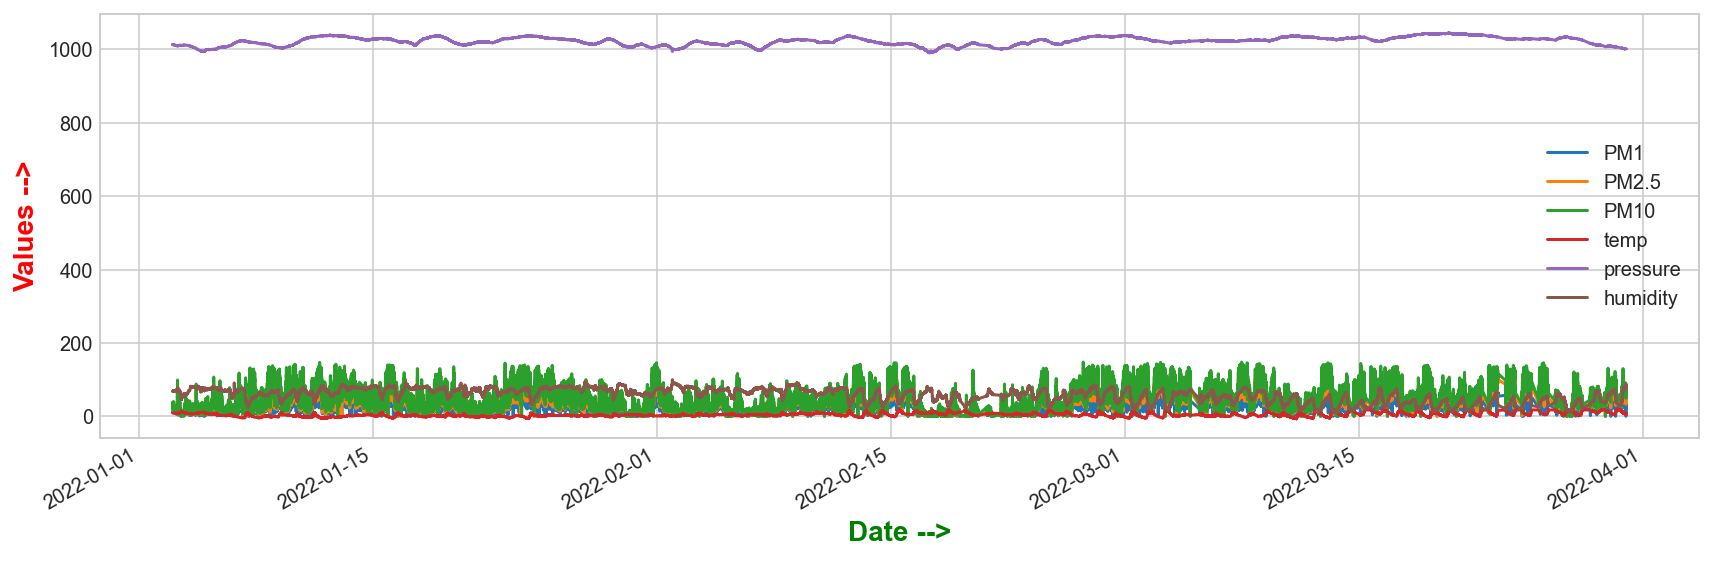

In [71]:
for i in get_months():
    print(i)
    plot_data(
        MONTHS_DF,
        get_month(i)[0],
        get_month(i)[1],
        [
            "PM1",
            "PM2.5",
            "PM10",
            "temp",
            "pressure",
            "humidity",
        ],
    )

November


C:\Users\admin\AppData\Local\Temp\ipykernel_18984\2514345421.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])


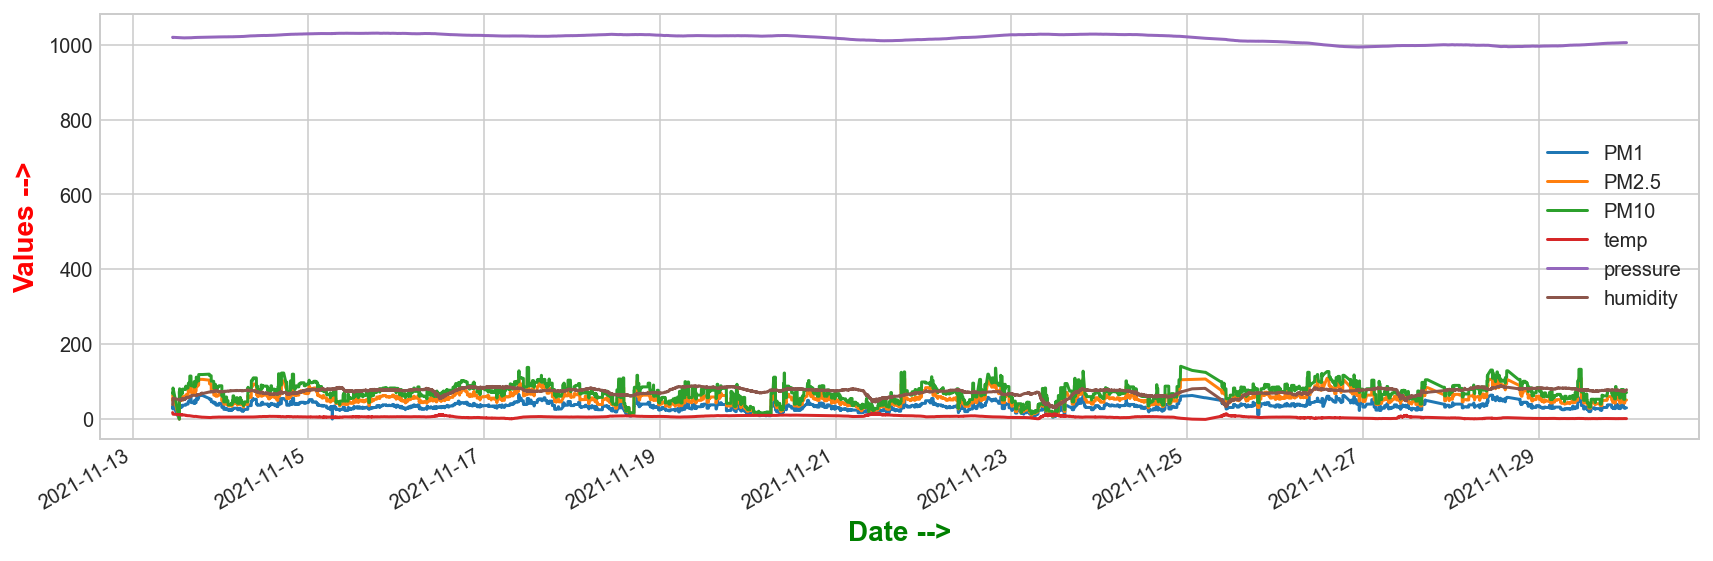

December


C:\Users\admin\AppData\Local\Temp\ipykernel_18984\2514345421.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])


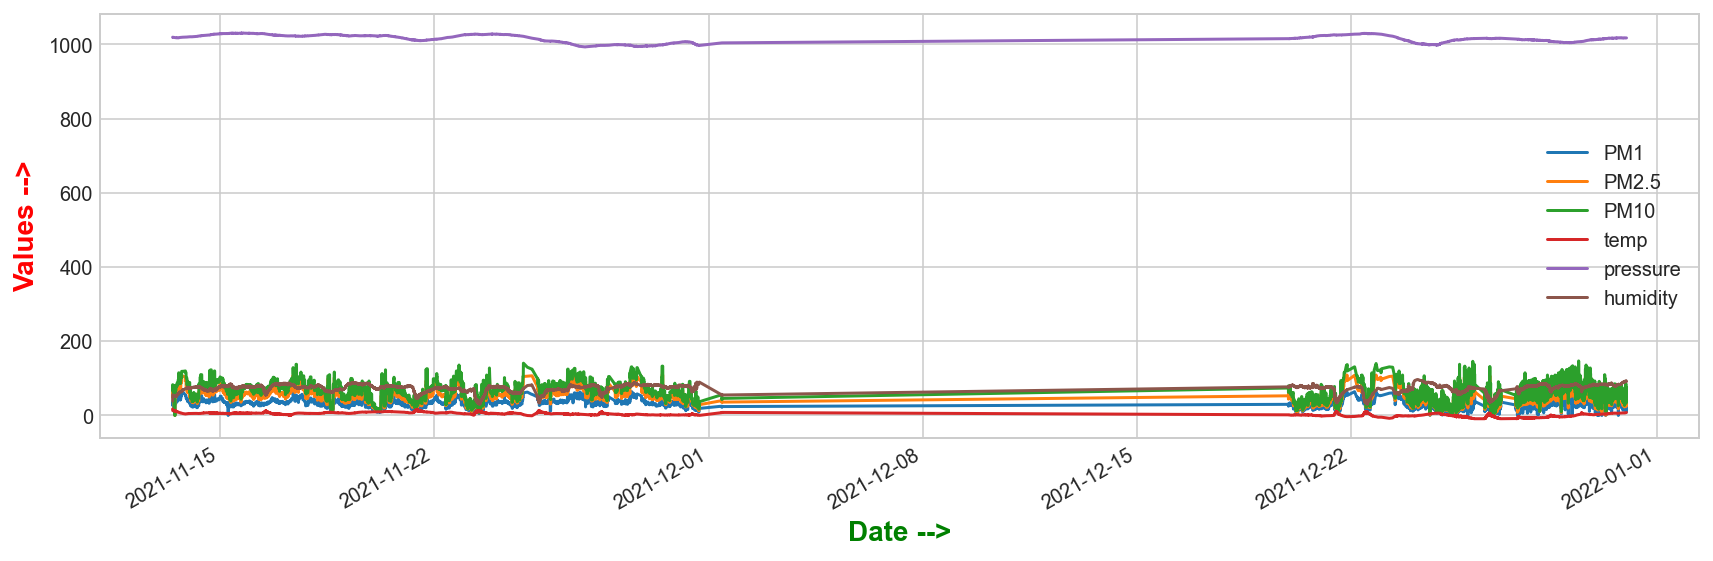

January


C:\Users\admin\AppData\Local\Temp\ipykernel_18984\2514345421.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])


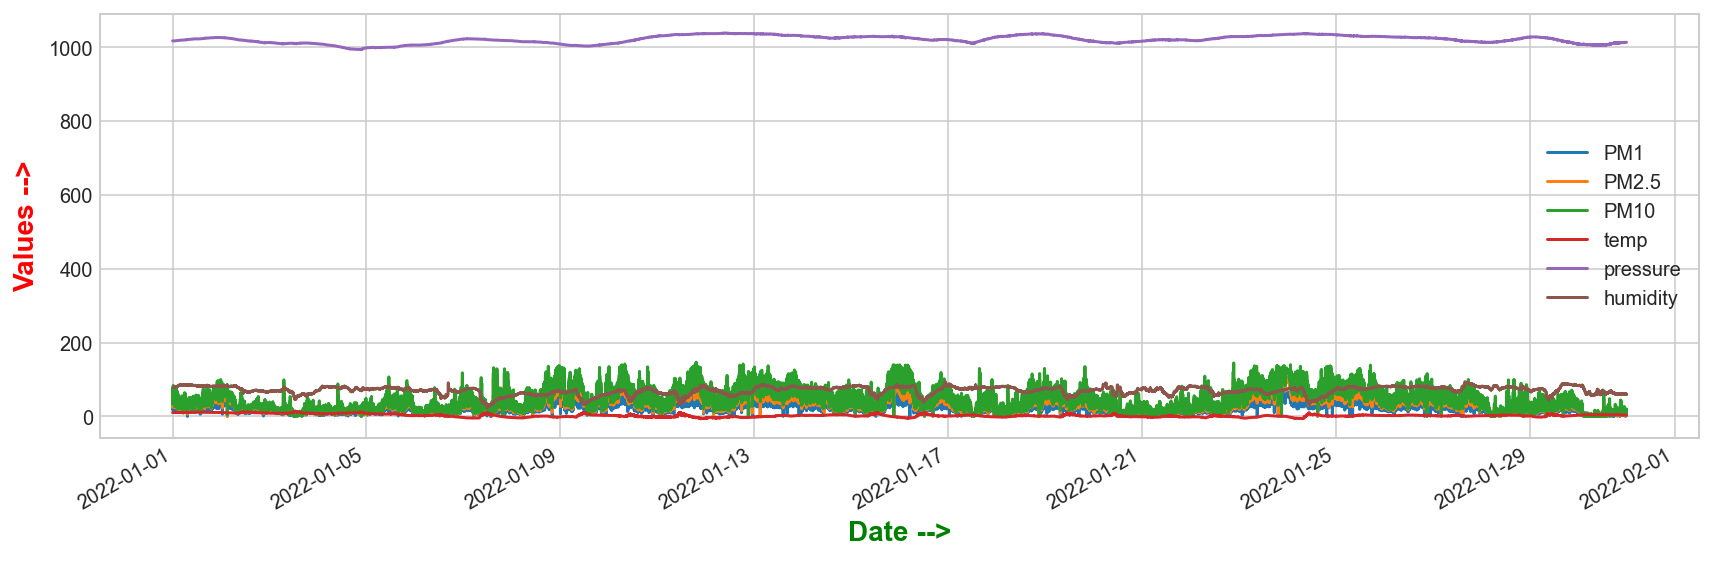

February


C:\Users\admin\AppData\Local\Temp\ipykernel_18984\2514345421.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])


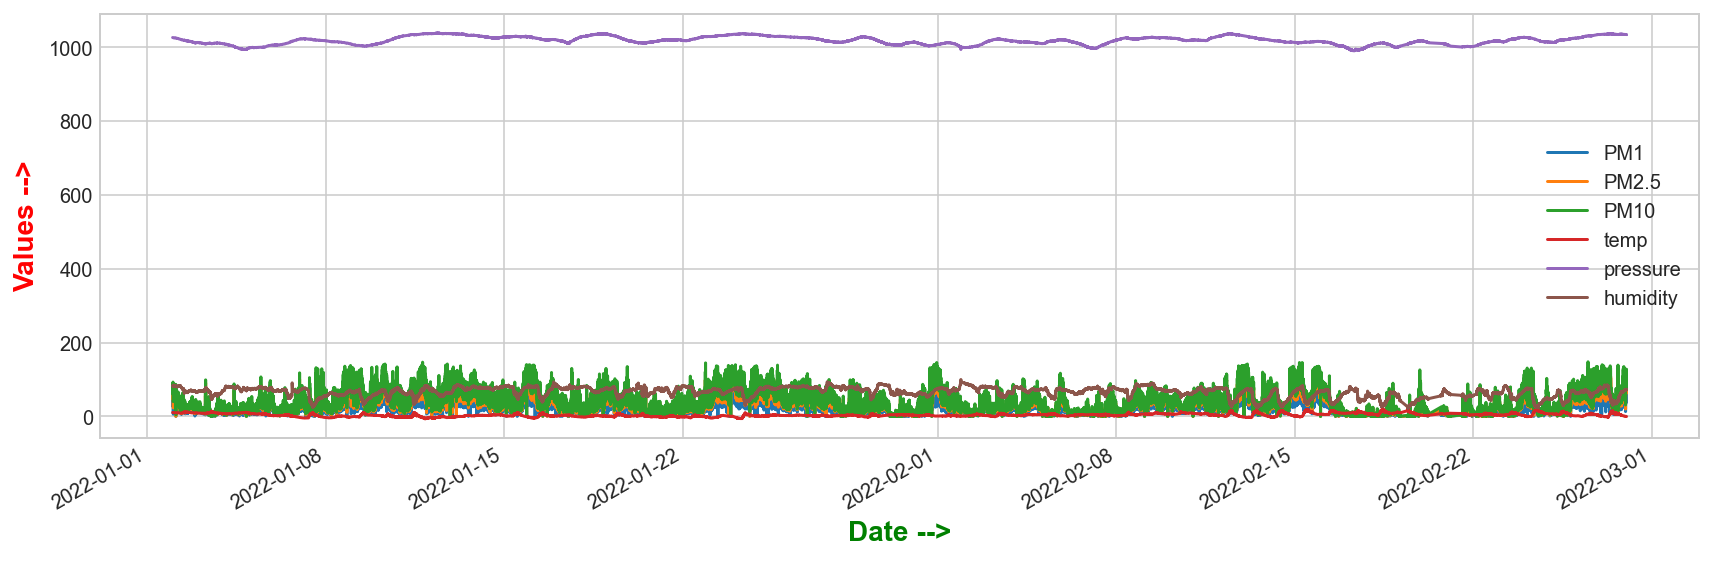

March


C:\Users\admin\AppData\Local\Temp\ipykernel_18984\2514345421.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])


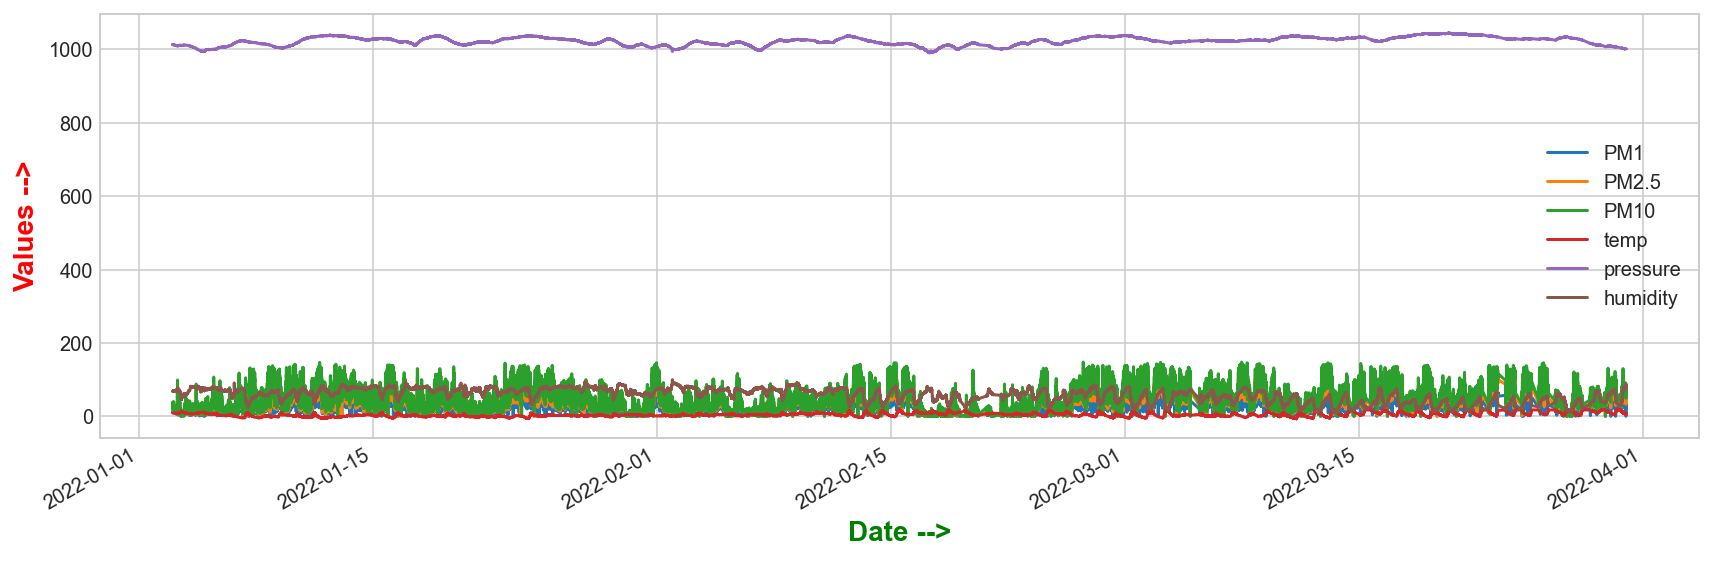

In [72]:
# for i in get_months():
#     print(i)
#     sub_plot(MONTHS_DF, get_month(i)[0], get_month(i)[1])
for i in get_months():
    print(i)
    plot_data(
        MONTHS_DF,
        get_month(i)[0],
        get_month(i)[1],
        [
            "PM1",
            "PM2.5",
            "PM10",
            "temp",
            "pressure",
            "humidity",
        ],
    )

In [73]:
day_start_hour = "23:59:59"
day_end_hour = "00:00:00"


def values_sepcific():
    plot_1 = ["PM1", "PM2.5", "PM10", "humidity"]
    plot_2 = ["temp"]
    plot_3 = [
        "pressure",
    ]

    return plot_1, plot_2, plot_3


def plot_specfic_data(df, start_date, end_date):
    pass

In [74]:
""""
November los date plot and los week
"""


def get_nov_dates(start_day, end_day, week_start, week_end) -> str:
    pass


nov_start_day = "14/11/21"
nov_end_day = "15/11/21"
nov_week_start = "20/11/21"
nov_week_end = "26/11/21"

dec_start_day = "02/12/21"
dec_end_day = "03/12/21"
dec_week_start = "24/12/21"
dec_week_end = "30/12/21"

jan_start_day = "03/01/22"
jan_end_day = "04/01/22"
jan_week_start = "04/01/22"
jan_week_end = "10/01/22"

feb_start_day = "22/02/22"
feb_end_day = "23/02/22"
feb_week_start = "14/02/22"
feb_week_end = "20/02/22"

march_start_day = "28/03/22"
march_end_day = "29/03/22"
march_week_start = "02/03/22"
march_week_end = "08/03/22"

months_plots_days = [
    [nov_start_day, nov_end_day],
    [dec_start_day, dec_end_day],
    [jan_start_day, jan_end_day],
    [feb_start_day, feb_end_day],
    [march_start_day, march_end_day],
]

months_plots_weeks = [
    [nov_week_start, nov_week_end],
    [dec_week_start, dec_week_end],
    [jan_week_start, jan_week_end],
    [feb_week_start, feb_week_end],
    [march_week_start, march_week_end],
]

print(" ---- DAYS ----")

for i in months_plots_days:

    print(f"{i[0]} - {i[1]}")
    plot_specific_data(MONTHS_DF, i[0], i[1], values_sepcific())

# print(" ---- WEEKS ----")

# for i in months_plots_weeks:
#     print(f"{i[0]} - {i[1]}")
#     plot_specific_data(MONTHS_DF, i[0], i[1], values_sepcific())

 ---- DAYS ----
14/11/21 - 15/11/21


C:\Users\admin\AppData\Local\Temp\ipykernel_18984\2514345421.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [ ]:
print(f"finish: {datetime.now()}")

finish: 2022-08-10 12:01:48.153895


In [ ]:
plot_specific_data(MONTHS_DF, "10/01/22", "01/12/2022", ["PM1","PM2.5", "PM10", "humidity"])

C:\Users\admin\AppData\Local\Temp\ipykernel_18984\1461825069.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [ ]:
y = data['GPA']
x1 = data['SAT']

#Plotting data
plt.scatter(x1,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()